In [273]:
import numpy as np
import pandas as pd

# 데이터 읽기
df = pd.read_csv("./obesity_data.csv")
df.head()
# ObesityCategory 열의 값 분포 확인
print(df["ObesityCategory"].value_counts())

ObesityCategory
Normal weight    371
Overweight       295
Obese            191
Underweight      143
Name: count, dtype: int64


In [274]:
# ObesityCategory를 열을 numpy 배열로 변환하고, 원본 데이터프레임에서 삭제
target = df["ObesityCategory"].to_numpy()

# ObesityCategory 열 제거
df.drop("ObesityCategory", axis=1, inplace=True)
print(df)
data = df.to_numpy()
print(data)

     Age  Gender      Height     Weight        BMI  PhysicalActivityLevel
0     56    Male  173.575262  71.982051  23.891783                      4
1     69    Male  164.127306  89.959256  33.395209                      2
2     46  Female  168.072202  72.930629  25.817737                      4
3     32    Male  168.459633  84.886912  29.912247                      3
4     60    Male  183.568568  69.038945  20.487903                      3
..   ...     ...         ...        ...        ...                    ...
995   18    Male  155.588674  64.103182  26.480345                      4
996   35  Female  165.076490  97.639771  35.830783                      1
997   49  Female  156.570956  78.804284  32.146036                      1
998   64    Male  164.192222  57.978115  21.505965                      4
999   66  Female  178.537130  74.962164  23.517168                      1

[1000 rows x 6 columns]
[[56 'Male' 173.5752624383722 71.98205082003972 23.89178262396797 4]
 [69 'Male' 164.12

In [275]:
# 성별을 숫자형으로 변환 Male 1, Female 0

df.loc[df['Gender'] == 'Male', 'Gender'] = 1
df.loc[df['Gender'] == 'Female','Gender' ] = 0
df

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel
0,56,1,173.575262,71.982051,23.891783,4
1,69,1,164.127306,89.959256,33.395209,2
2,46,0,168.072202,72.930629,25.817737,4
3,32,1,168.459633,84.886912,29.912247,3
4,60,1,183.568568,69.038945,20.487903,3
...,...,...,...,...,...,...
995,18,1,155.588674,64.103182,26.480345,4
996,35,0,165.076490,97.639771,35.830783,1
997,49,0,156.570956,78.804284,32.146036,1
998,64,1,164.192222,57.978115,21.505965,4


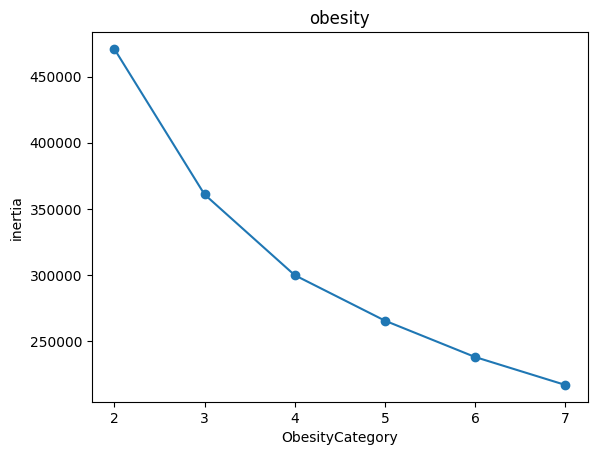

In [276]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# 엘보우 방법을 위한 왜곡 값을 저장할 리스트 초기화
inertia = []

# 2부터 7까지의 클러스터 개수에 대해 K-Means 모델을 학습
for w in range(2, 8):
    km = KMeans(n_clusters=w, n_init='auto', random_state=40)
    km.fit(df.to_numpy())
    inertia.append(km.inertia_)

# inertia를 그래프로 표시
plt.plot(range(2, 8), inertia,marker='o')
plt.xlabel('ObesityCategory')
plt.ylabel('inertia')
plt.title('obesity')
plt.show()

In [279]:
# KMeans 를 이용해 군집화 실행하고 라벨 개수 파악하기
km = KMeans(n_clusters=3, n_init='auto', random_state=40)
km.fit(df.to_numpy())
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([400, 314, 286]))


In [282]:
clusters = km.fit_predict(df.to_numpy())

In [283]:
# 결과를 원본 데이터프레임에 추가
df['Cluster'] = clusters

In [304]:
# PCA를 사용하여 2D 시각화
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.to_numpy())
df_pca = pd.DataFrame(data=principal_components, columns=['Component 1', 'Component 2'])
df_pca['Cluster'] = clusters


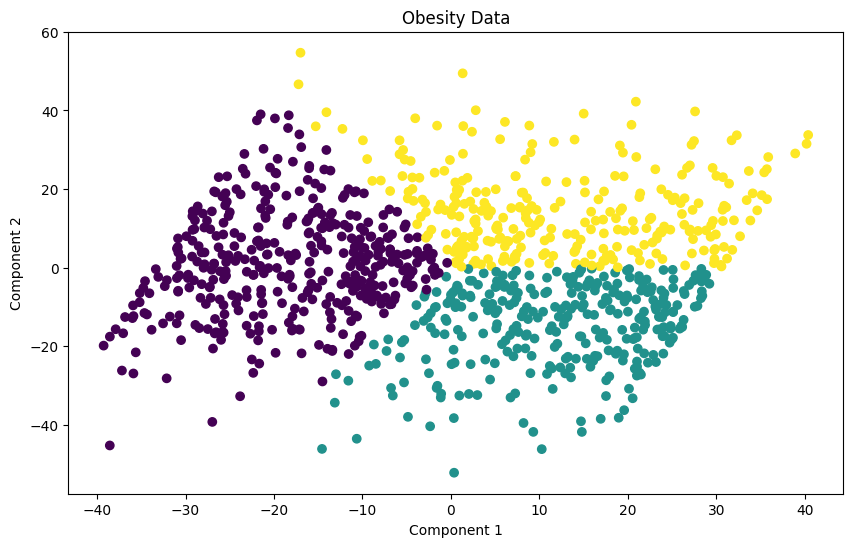

In [305]:
# 클러스터 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['Component 1'], df_pca['Component 2'], c=df_pca['Cluster'], cmap='viridis', marker='o' )
plt.title('Obesity Data')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()